In [115]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [116]:
sd_imposed_threshold = 0.0035
sd_relaxed_threshold = 0.0005
sd_imposed = False

In [117]:
def seir_model_old(t, y, beta, sigma, gamma):
    s, e, i, r = y
    return np.array([-beta * i * s,
                     -sigma * e + beta * i * s, 
                     -gamma * i + sigma * e, 
                     gamma * i])

In [118]:
# seir_model: the seir model to predict the population state over time:
# param array t: Time interval
# param y: the current population state
# param float beta: The parameter controlling how often a susceptible-infected contact results in a new infection.
# param float gamma: The rate an infected recovers and moves into the resistant phase.
# param float sigma: The rate at which an exposed person becomes infective.
# return: the next population state
# todo1: update the model
def seir_model(t, y, beta, sigma, gamma):
    
    global sd_imposed
    
    #s: the percentage of individuals who are susceptible to the disease being modeled
    #e: the percentage of individuals who are exposed to the disease
    #i: the percentage of individuals infected with the disease
    #r; the percentage of individuals who can be removed from the system
    s, e, i, r = y

    # social distancing is imposed when it passes the threshould not relaxed when it passes another threshold
    effective_beta = beta
    if (not sd_imposed) and i >=  sd_imposed_threshold:
        sd_imposed = True
    if sd_imposed and i < sd_relaxed_threshold:
        sd_imposed = False
        
    # each period of social distancing reduces R0 by 60%
    # beta = R0 * gamma
    # shall we use R0??
    effective_beta = beta * 0.6 if sd_imposed else beta
    
    return np.array([-effective_beta * i * s,
                     -sigma * e + effective_beta * i * s, 
                     -gamma * i + sigma * e, 
                     gamma * i])

In [119]:
# solve: the solver for the IVP for the seir model given the initial setting
def solve_seir_model(t, y0, beta, sigma, gamma):
    return solve_ivp(lambda t, y: seir_model(t, y, beta, sigma, gamma), t, y0, rtol=1e-6)

In [120]:
# solve the IVP
sol = solve_seir_model([0, 60], [0.99, 0.01, 0, 0], 1, 1, 0.1)

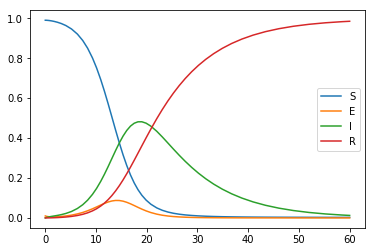

In [121]:
# plot S, E, I ,R
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['S', 'E', 'I', 'R']);

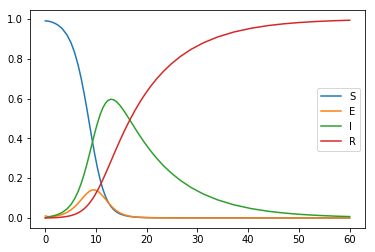

In [123]:
sol = solve_ivp(lambda t, y: seir_model_old(t, y, 1, 1, 0.1), [0, 60], [0.99, 0.01, 0, 0], rtol=1e-6)
# plot S, E, I ,R
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['S', 'E', 'I', 'R']);

In [ ]:
# plot I
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(sol.t, sol.y[2].T)